In [1]:
import pandas as pd
import numpy as np

customer_demo = pd.read_csv('data/01_customer_demo.txt')
shop_tran = pd.read_csv('data/02_shopping_tran.txt')
nonshop_tran = pd.read_csv('data/03_non_shopping_tran.txt')
shopping_cat = pd.read_csv('data/04_shopping_category.txt')

print(customer_demo.shape,shop_tran.shape,nonshop_tran.shape,
     shopping_cat.shape)

customer_demo.columns = customer_demo.columns.str.lower()
shop_tran.columns = shop_tran.columns.str.lower()
nonshop_tran.columns = nonshop_tran.columns.str.lower()
shopping_cat.columns = shopping_cat.columns.str.lower()

(20000, 4) (3641082, 9) (178659, 5) (3788, 5)


In [2]:
shop_age = pd.merge(shop_tran,customer_demo[['id','age_prd']],on='id')
shop_age.head()

,id,rct_no,biz_unit,pd_s_c,br_c,de_dt,de_hr,buy_am,buy_ct,age_prd
0,4008,2108,A01,215,2,20150216,13,59600,2,50PRD
1,4008,351820,A01,7,2,20150121,19,10000,1,50PRD
2,4008,384319,A01,210,2,20150207,17,19900,1,50PRD
3,4008,2108,A01,215,2,20150216,13,19800,1,50PRD
4,4008,2108,A01,328,2,20151107,18,230000,1,50PRD


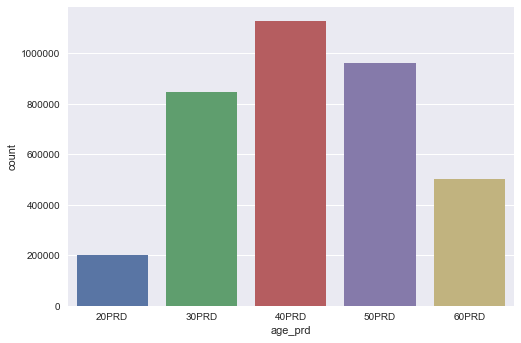

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='age_prd',data=shop_age,order=['20PRD','30PRD','40PRD','50PRD','60PRD'])
plt.show()

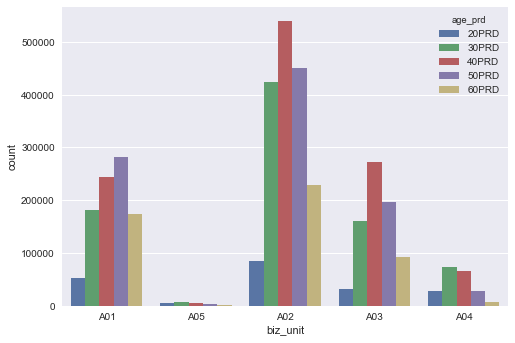

In [4]:
sns.countplot(x='biz_unit',hue='age_prd',data=shop_age,hue_order=['20PRD','30PRD','40PRD','50PRD','60PRD'])
plt.show()

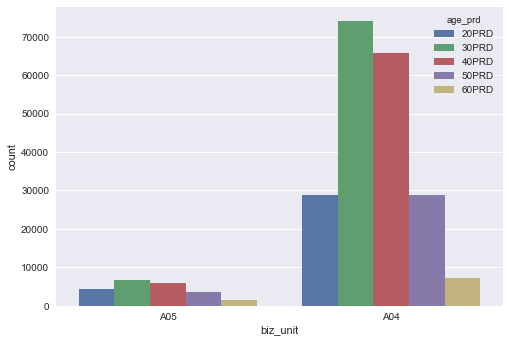

In [5]:
sns.countplot(x='biz_unit',hue='age_prd',
              data=shop_age[(shop_age.biz_unit == 'A05') | (shop_age.biz_unit == 'A04')],
             hue_order=['20PRD','30PRD','40PRD','50PRD','60PRD'])
plt.show()

In [6]:
sub = shop_age[['id','biz_unit','age_prd','buy_am','buy_ct']].copy()
sub.head()

,id,biz_unit,age_prd,buy_am,buy_ct
0,4008,A01,50PRD,59600,2
1,4008,A01,50PRD,10000,1
2,4008,A01,50PRD,19900,1
3,4008,A01,50PRD,19800,1
4,4008,A01,50PRD,230000,1


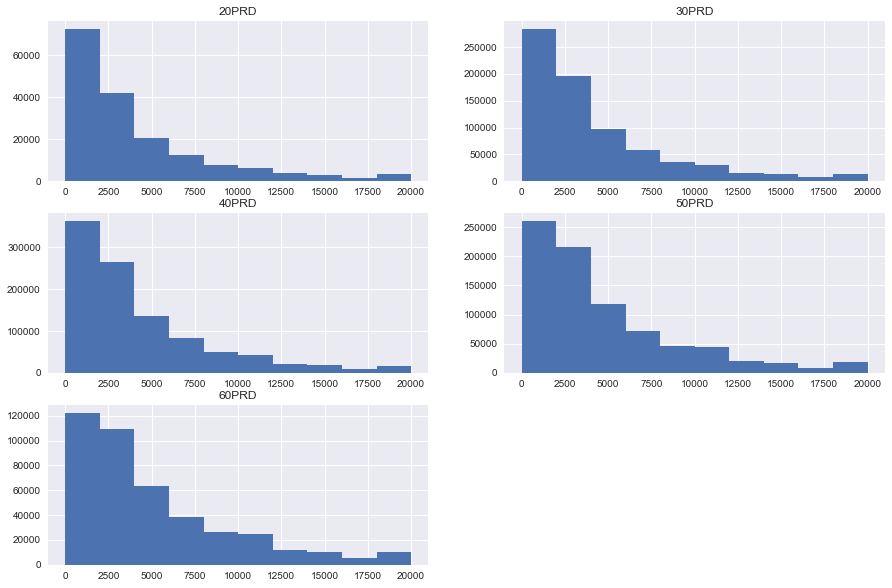

In [7]:
sub['avg_buy_am'] = sub.buy_am / sub.buy_ct
plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
plt.hist(x=sub[sub.age_prd=='20PRD'].avg_buy_am,bins=10,range=[0,20000])
plt.title('20PRD')
plt.subplot(3,2,2)
plt.hist(x=sub[sub.age_prd=='30PRD'].avg_buy_am,bins=10,range=[0,20000])
plt.title('30PRD')
plt.subplot(3,2,3)
plt.hist(x=sub[sub.age_prd=='40PRD'].avg_buy_am,bins=10,range=[0,20000])
plt.title('40PRD')
plt.subplot(3,2,4)
plt.hist(x=sub[sub.age_prd=='50PRD'].avg_buy_am,bins=10,range=[0,20000])
plt.title('50PRD')
plt.subplot(3,2,5)
plt.hist(x=sub[sub.age_prd=='60PRD'].avg_buy_am,bins=10,range=[0,20000])
plt.title('60PRD')
plt.show()

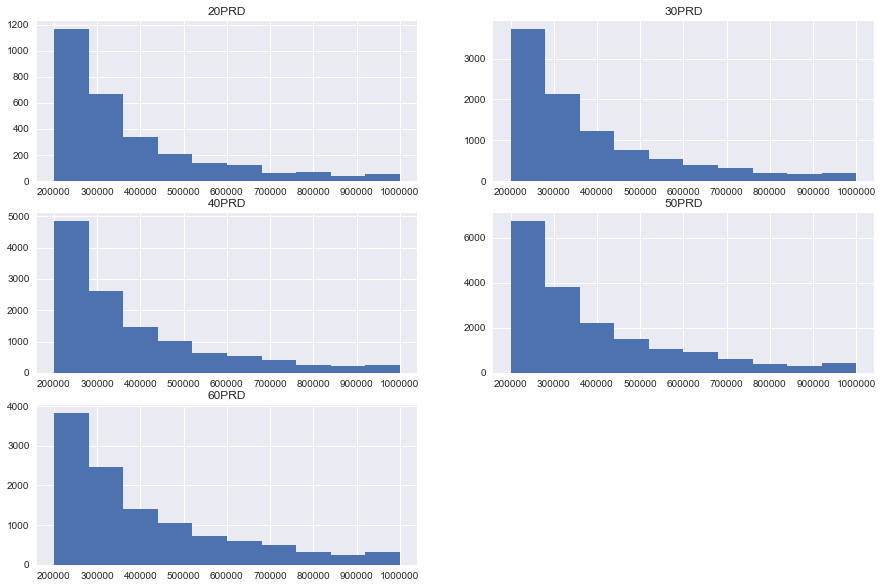

In [8]:
sub['avg_buy_am'] = sub.buy_am / sub.buy_ct
plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
plt.hist(x=sub[sub.age_prd=='20PRD'].avg_buy_am,bins=10,range=[200000,1000000])
plt.title('20PRD')
plt.subplot(3,2,2)
plt.hist(x=sub[sub.age_prd=='30PRD'].avg_buy_am,bins=10,range=[200000,1000000])
plt.title('30PRD')
plt.subplot(3,2,3)
plt.hist(x=sub[sub.age_prd=='40PRD'].avg_buy_am,bins=10,range=[200000,1000000])
plt.title('40PRD')
plt.subplot(3,2,4)
plt.hist(x=sub[sub.age_prd=='50PRD'].avg_buy_am,bins=10,range=[200000,1000000])
plt.title('50PRD')
plt.subplot(3,2,5)
plt.hist(x=sub[sub.age_prd=='60PRD'].avg_buy_am,bins=10,range=[200000,1000000])
plt.title('60PRD')
plt.show()